In [239]:
import folium
import pandas as pd
import numpy as np
import warnings
import matplotlib
import matplotlib.pyplot as plt
import math
import random
import seaborn as sns

from matplotlib import font_manager,rc
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings(action='ignore')
matplotlib.rc('font',family=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name())

%matplotlib inline

In [2]:
palette = ['#eb9385', '#f5eedb', '#99c0bc', '#937782', '#2d4249']

# 코로나가 고령자에게 미치는 영향

<br />
<br />

**목차**
* 연령대별 코로나 환자 수 확인
* 연령대로 청년, 중년, 노년 분류 후 코로나로 인한 사망률 확인
* 기저질환 여부가 코로나에 미치는 영향
* 고령자들의 고위험장소 분류

...
* 고령도시를 분류하고, 고령도시의 코로나 ...뭠멈머

In [3]:
# 코로나가 노인에게 미치는 영향
# 
# 실제로 코로나가 나이대와 연관이 있는지 확인...ok
# 기저질환이있는 사람이 코로나에걸리게 되면 미치는 영향
#
# 노인인구와 독거노인비율이 많은 곳의 연령대별 코로나 감염수와 사망자 수
# 노인인구와 독거노인비율이 많은 지역의 노인들 코로나 감염경로를 구하고, 노인과 다른 연령대의 접촉이라면 접촉된 장소 확인
# 

In [4]:
# 코로나와 기저질환의 관계

patientInfo = pd.read_csv('./coronavirusdataset/PatientInfo.csv')
# patientInfo

In [5]:
# 노인인구와 독거노인비율이 많은 곳의 연령대별 코로나 감염수와 사망자 수 구하기
# 노인인구 비율이 높은곳의 기준? =>

region = pd.read_csv('./coronavirusdataset/Region.csv')
df = region[['elderly_population_ratio', 'elderly_alone_ratio']]
# df.describe()
# df[df.elderly_population_ratio >= 30]

## 연령대별 코로나 환자 수

id 결측치 개수: 0
id 데이터 개수: 4004
id 유니크 개수: 4004
age 결측치 제거 전: 4004
age 결측치 개수: 479
age 결측치 제거 후: 3525
age 값: 
20     860
50     625
30     494
40     483
60     423
70     210
80     162
10     160
0       60
90      47
100      1
Name: age, dtype: int64


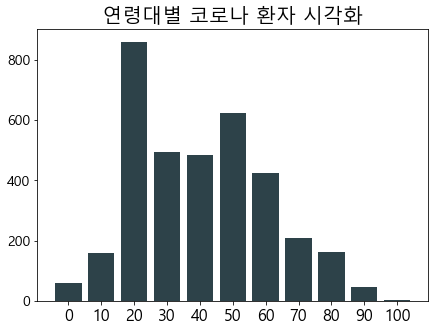

In [6]:
# 연령대별로 코로나 

patientInfo = pd.read_csv('./coronavirusdataset/PatientInfo.csv')
patientInfo

# 환자 아이디값에 중복치가 있는지 확인
print(f'id 결측치 개수: {patientInfo.patient_id.isna().sum()}')
print(f'id 데이터 개수: {patientInfo.patient_id.count()}')
print(f'id 유니크 개수: {len(patientInfo.patient_id.unique())}')

# 연령대 값에 결측치가 있는지 확인하고 제거
na = patientInfo.age.isna()
print(f'age 결측치 제거 전: {na.count()}')
ages = patientInfo.dropna(subset=['age'])
print(f'age 결측치 개수: {na.sum()}')
print(f'age 결측치 제거 후: {ages.age.isna().count()}')

# 연령대 전처리
ages['age'] = ages['age'].apply(lambda x: int(x.replace('s', '')))
print(f'age 값: \n{ages.age.value_counts()}')

# 
# ages = ages.sort_values(by=['age'], axis=0)
# ages = ages.reset_index()

# 연령대별 코로나 환자 시각화
index = range(len(ages.age.unique()))
count = ages.age.value_counts().sort_index()

plt.figure(figsize=(7, 5))
plt.bar(index, count, color=palette[4])
plt.xticks(index, count.index, fontsize=16)
plt.yticks(fontsize=14)
plt.title('연령대별 코로나 환자 시각화', fontsize=20)
plt.show()

## 청년, 중년, 노년기별 코로나로 인한 사망률

In [7]:
# state 칼럼 결측치 확인
print(f'state 칼럼 결측치 확인: {ages.shape} / {ages.state.shape}')
# state 원 핫 인코딩
ages = pd.get_dummies(ages, columns = ['state'])

# 연령대를 구분하는 칼럼 추가
life_cycle = [-1, 35, 65, 125]
labels = ["청년", "중년", "노년"]
cats = pd.cut(ages.age.tolist(), life_cycle, labels=labels)
ages['group'] = cats

# 카테고리별 격리, 퇴원, 사맡자 수
state = ages.groupby('group')[['state_isolated', 'state_released', 'state_deceased']].sum()
state

state 칼럼 결측치 확인: (3525, 18) / (3525,)


,state_isolated,state_released,state_deceased
group,,,
청년,516.0,1057.0,1.0
중년,515.0,995.0,21.0
노년,174.0,194.0,52.0


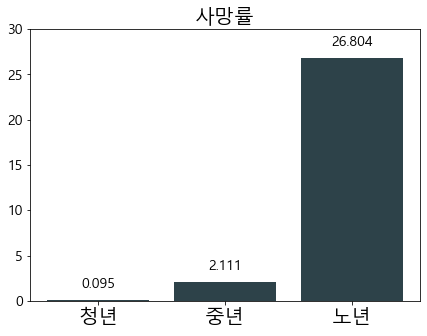

In [8]:
index = range(len(state.index))
count = [((y / x) * 100) for x, y in zip(state.state_released, state.state_deceased)]

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
plt.bar(index, count, color=palette[4])
plt.xticks(index, labels, fontsize=20)
plt.yticks(fontsize=14)
plt.title('사망률', fontsize=20)
plt.ylim(0, 30)

for x, y in zip(index, count):
        ax.text(x, y+1, round(y, 3), ha='center', va='bottom', fontsize=14)

## 기저질환 여부가 코로나에 미치는 영향

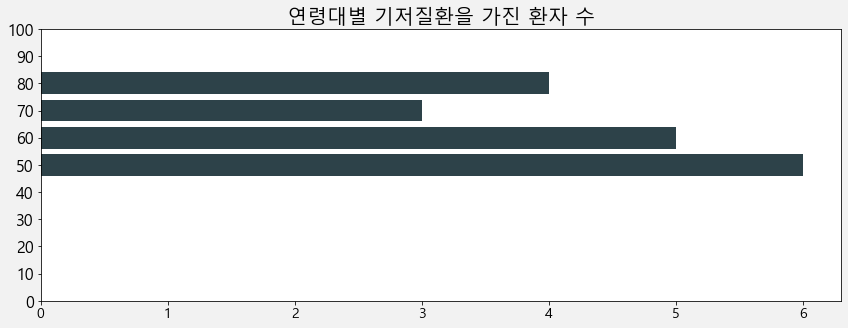

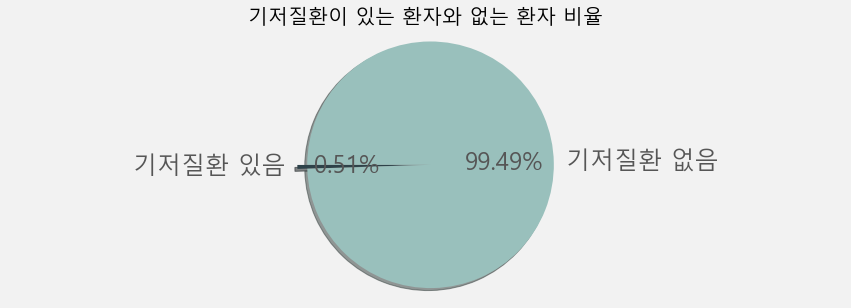

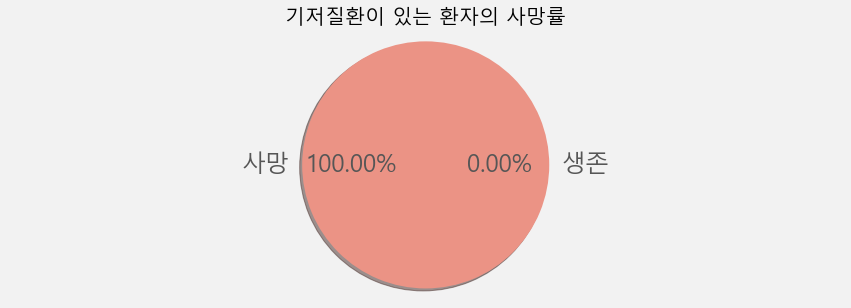

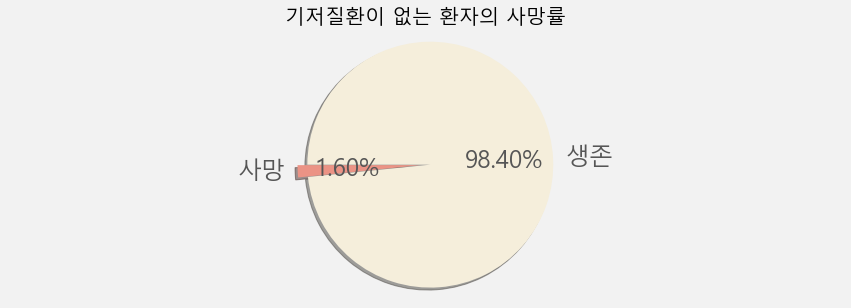

In [294]:
disease_true = ages[ages.disease == True]
disease_false = ages[ages.disease.isna()]

# 기저질환보유자 연령대 시각화
index = range(0, 100+1, 10)
count = disease_true.age.value_counts().sort_index()
fig = plt.figure(figsize=(14.35, 5))
plt.barh(count.index, count, color=palette[4], align='center', height=8)
plt.yticks(index, index, fontsize=16)
plt.xticks(fontsize=14)
plt.title('연령대별 기저질환을 가진 환자 수', fontsize=20)
ax = fig
ax.set_facecolor('#f2f2f2')
plt.show()

# 기저질환을 가지고있는 환자와 없는 환자의 비율 시각화
disease_patient_ratio = [
    disease_true.patient_id.count(),
    disease_false.patient_id.count()
]
fig = plt.figure(figsize=(15, 5))
plt.pie(disease_patient_ratio,
        labels=['기저질환 있음', '기저질환 없음'], 
        colors=[palette[4], palette[2]], 
        autopct='%1.2f%%',
        shadow=True, 
        startangle=180,
        explode=(0.08, 0),
        textprops={'fontsize': 24, 'color': '#565656'})
plt.axis('equal')
plt.title('기저질환이 있는 환자와 없는 환자 비율', fontsize=20)
ax = fig
ax.set_facecolor('#f2f2f2')
plt.show()

# 기저질환을 가지고 있는 환자의 사망률 시각화
disease_true_ratio = [
    disease_true[disease_true.state_deceased == 1]['state_deceased'].count(), 
    disease_true[disease_true.state_deceased == 0]['state_deceased'].count()
]
fig = plt.figure(figsize=(15, 5))
plt.pie(disease_true_ratio,
        labels=['사망', '생존'], 
        colors=[palette[0], palette[1]], 
        autopct='%1.2f%%',
        shadow=True, 
        textprops={'fontsize': 24, 'color': '#565656'})
plt.axis('equal')
plt.title('기저질환이 있는 환자의 사망률', fontsize=20)
ax = fig
ax.set_facecolor('#f2f2f2')
plt.show()

# 기저질환을 가지고 있지 않은 환자의 사망률 시각화
disease_false_ratio = [
    disease_false[disease_false.state_deceased == 1]['state_deceased'].count(), 
    disease_false[disease_false.state_deceased == 0]['state_deceased'].count()
]
fig = plt.figure(figsize=(15, 5))
plt.pie(disease_false_ratio,
        labels=['사망', '생존'], 
        colors=[palette[0], palette[1]], 
        autopct='%1.2f%%',
        shadow=True, 
        startangle=180,
        explode=(0.08, 0),
        textprops={'fontsize': 24, 'color': '#565656'})
plt.axis('equal')
plt.title('기저질환이 없는 환자의 사망률', fontsize=20)
ax = fig
ax.set_facecolor('#f2f2f2')
plt.show()

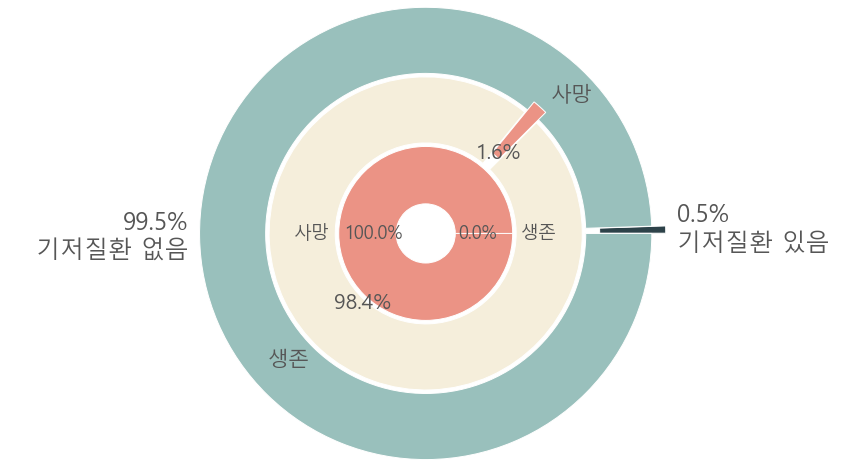

In [296]:
plt.rcParams['figure.figsize'] = [15, 8]
width_num = 0.4
fig, ax = plt.subplots()
ax.axis('equal')
x = disease_patient_ratio[1]
y = disease_patient_ratio[0]
pie_outside, _ = ax.pie(disease_patient_ratio, 
                        radius=1.3, 
                        labels=[
                            str(((y / x) * 100).round(1))+'%\n기저질환 있음', 
                            str(100-((y / x) * 100).round(1))+'%\n기저질환 없음'
                        ],
                        labeldistance=1.05,
                        shadow=False, 
                        explode=(0.08, 0),
                        colors=[palette[4], palette[2]],
                        textprops={'fontsize': 24, 'color': '#565656'})
plt.setp(pie_outside, 
         width=width_num-0.02, 
         edgecolor='white')
pie_inside, plt_labels, junk = \
    ax.pie(disease_false_ratio, 
           radius=(1.3 - width_num), 
           labels=['사망', '생존'], 
           labeldistance=1.1, 
           autopct='%1.1f%%', 
           explode=(0.08, 0),
           colors=[palette[0], palette[1]], 
           startangle=45,
           textprops={'fontsize': 21, 'color': '#565656'})
plt.setp(pie_inside, 
         width=width_num-0.02, 
         edgecolor='white')
pie_inside, plt_labels, junk = \
    ax.pie(disease_true_ratio, 
           radius=(1.3 - width_num-width_num), 
           labels=['사망', '생존'], 
           labeldistance=1.1, 
           autopct='%1.1f%%', 
           startangle=0,
           colors=[palette[0], palette[2]], 
           textprops={'fontsize': 18, 'color': '#565656'})
plt.setp(pie_inside, 
         width=width_num-0.07, 
         edgecolor='white')
plt.show()

## 초고령도시 찾기

노년층 인구 비율이 14% 이상일 떄 고령 사회,  
20% 이상은 초고령 사회로 분류

In [292]:
# 고령도시 중 감염자가 많은 곳을 선정 -> 감염자가 많다는 기준은 어디서?

In [12]:
region = pd.read_csv('./coronavirusdataset/Region.csv')
region = region[['code', 'province', 'city', 'elderly_population_ratio', 'elderly_alone_ratio', 'nursing_home_count']]
provinces = region.province.unique()

# 특별시 / 광역시 / 도 단위의 데이터 삭제
region['city'] = region['city'].apply(lambda x: np.nan  if x in provinces else x)
region = region.dropna()
region['address'] = region['city'] + ', ' + region['province'] 

# 노년 인구비율이 고령사회기준 이상인 시/군/구 선별
aging_society = region[df.elderly_population_ratio >= 20]
print(f'고령도시 개수: {aging_society.shape}')
print(f'도시 개수: 고유값={len(aging_society.address.unique())} / 총={aging_society.address.value_counts().count()}')
# 

고령도시 개수: (106, 7)
도시 개수: 고유값=106 / 총=106


In [13]:
aging_society.describe()

,code,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
count,106.000000,106.000000,106.00000,106.000000
mean,43928.113208,28.821604,15.95000,132.754717
std,15995.393808,5.290467,4.23739,95.017774
min,11050.000000,20.290000,8.20000,11.000000
25%,30162.500000,24.867500,12.60000,70.250000
50%,50090.000000,28.790000,15.90000,103.500000
75%,60067.500000,33.000000,19.10000,178.750000
max,61180.000000,40.260000,24.70000,594.000000


In [14]:
patientInfo = pd.read_csv('./coronavirusdataset/PatientInfo.csv')
patientInfo = patientInfo.dropna(subset=['city'])
patientInfo = patientInfo.drop(patientInfo[patientInfo.city == 'etc'].index, axis=0)
patientInfo['address'] = patientInfo['city'] + ', ' + patientInfo['province'] 
print(f'도시 개수: 고유값={len(patientInfo.address.unique())} / 총={patientInfo.address.value_counts().count()}')

# patient_group = patientInfo.groupby('address')['patient_id'].count()

도시 개수: 고유값=170 / 총=170


In [15]:
patientInfo.shape

(3853, 19)

In [20]:
tdf = pd.merge(aging_society, patientInfo, on='address')
tdf

,code,province_x,city_x,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,address,patient_id,global_num,sex,...,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,11050,Busan,Dong-gu,25.42,13.8,239,"Dong-gu, Busan",1100000120,NaN,male,...,NaN,overseas inflow,NaN,NaN,2,2020-04-01,2020-04-06,NaN,NaN,isolated
1,11110,Busan,Seo-gu,24.36,12.3,235,"Seo-gu, Busan",1100000013,NaN,male,...,NaN,etc,NaN,NaN,15,NaN,2020-02-22,NaN,NaN,released
2,11110,Busan,Seo-gu,24.36,12.3,235,"Seo-gu, Busan",1100000019,NaN,female,...,NaN,Onchun Church,NaN,1100000016,16,NaN,2020-02-23,NaN,NaN,released
3,11110,Busan,Seo-gu,24.36,12.3,235,"Seo-gu, Busan",1100000020,NaN,female,...,NaN,contact with patient,NaN,1100000013,22,2020-02-20,2020-02-23,NaN,NaN,released
4,11110,Busan,Seo-gu,24.36,12.3,235,"Seo-gu, Busan",1100000074,NaN,male,...,NaN,etc,NaN,NaN,10,NaN,2020-02-29,NaN,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,61180,Gyeongsangnam-do,Hapcheon-gun,38.44,24.7,96,"Hapcheon-gun, Gyeongsangnam-do",6100000018,NaN,female,...,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-24,NaN,NaN,released
579,61180,Gyeongsangnam-do,Hapcheon-gun,38.44,24.7,96,"Hapcheon-gun, Gyeongsangnam-do",6100000019,NaN,female,...,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-24,NaN,NaN,released
580,61180,Gyeongsangnam-do,Hapcheon-gun,38.44,24.7,96,"Hapcheon-gun, Gyeongsangnam-do",6100000020,NaN,female,...,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-24,NaN,NaN,released
581,61180,Gyeongsangnam-do,Hapcheon-gun,38.44,24.7,96,"Hapcheon-gun, Gyeongsangnam-do",6100000021,NaN,male,...,NaN,contact with patient,NaN,6100000015,NaN,NaN,2020-02-24,NaN,NaN,released


In [68]:
case = pd.read_csv('./coronavirusdataset/Case.csv')
tttt = pd.read_csv('./coronavirusdataset/PatientInfo.csv')
tttt.infection_case.unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', nan, 'Itaewon Clubs',
       'Samsung Medical Center', 'Coupang Logistics Center',
       'Guri Collective Infection', 'KB Life Insurance',
       'Yeongdeungpo Learning Institute', 'Onchun Church',
       'Cheongdo Daenam Hospital', 'Suyeong-gu Kindergarten',
       'Ministry of Oceans and Fisheries', 'gym facility in Cheonan',
       'gym facility in Sejong', 'River of Grace Community Church',
       'Gyeongsan Seorin Nursing Home',
       'Gyeongsan Cham Joeun Community Center',
       'Gyeongsan Jeil Silver Town', 'Bonghwa Pureun Nursing Home',
       'Pilgrimage to Israel', 'Milal Shelter', 'Geochang Church',
       'Changnyeong Coin Karaoke'], dtype=object)

In [96]:
patient = ages[:]
patient = patient.dropna(subset=['city'])
patient = patient.drop(patient[patient.city == 'etc'].index, axis=0)
patient['address'] = patient['city'] + ', ' + patient['province'] 
patient = patient.reset_index()

add = aging_society.address.unique()
res = []
for i in range(len(patient.address)):
    if patient.address[i] in add:
        res.append(True)
        count += 1
    else:
        res.append(False)
# patient = patient[res]


In [ ]:
# 노인들의 감염경로와 청년들의 감염경로를 비교해서 노인들에게 고위험장소 분류

In [102]:
# 1. 고령도시 노인들의 감염 경로


## 고령자들의 고위험장소 분류

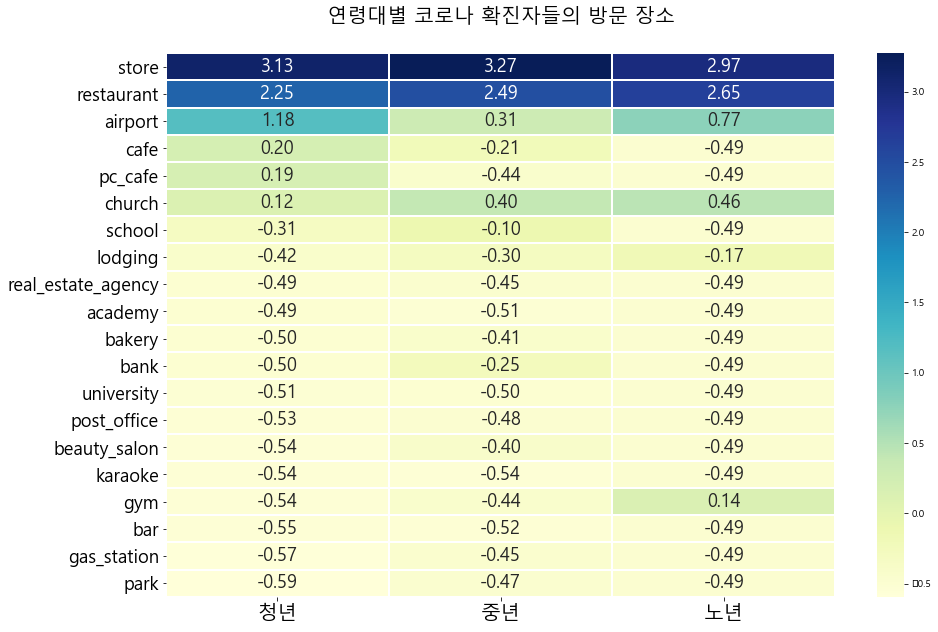

In [291]:
# 노인들의 이동경로와 청년들의 이동경로로 노인들에게 위험한 장소 분류

except_type = ['etc', 'hospital', 'pharmacy', 'administrative_area_level_1', 'public_transportation']

rute = pd.read_csv('./coronavirusdataset/PatientRoute.csv')
rute_type = [x for x in rute.type.unique() if x not in except_type]
for i in except_type:
    rute = rute.drop(rute[rute.type == i].index, axis=0)

r_patient = patient[:]
r_patient
rute_info = pd.merge(rute, r_patient[['patient_id', 'age', 'group', 'infection_case', 'infection_order', 'infected_by', 'contact_number', 'address']], on='patient_id')
rute_group_by_age = [ruteinfo[rute_info.group==x].type.value_counts() for x in ['청년', '중년', '노년']]

result = pd.DataFrame(rute_group_by_age).fillna(0)
result.index = ['청년', '중년', '노년']
result = result.T

plt.figure(figsize=(15, 10))
plt.title('연령대별 코로나 확진자들의 방문 장소\n', fontsize=20)
sns.heatmap(StandardScaler().fit_transform(result), 
            annot=True, 
            fmt='.2f',
            cmap="YlGnBu",
            annot_kws={"size":18},
            linewidths=1)
plt.xticks(np.arange(len(result.columns))+0.5, ['청년', '중년', '노년'], fontsize=20)
plt.yticks(np.arange(len(result.index))+0.5, result.index, fontsize=18, rotation=0)
plt.show()